In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

import pandas as pd

# Leer los datos del CSV
df = pd.read_csv('juego_de_la_vida_datos.csv')

# Separar las variables independientes (X) y la variable dependiente (y)
X = df[['Estado_T', 'Num_Celulas_Vivas_Adyacentes']]
y = df['Estado_T1']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de red neuronal
clf = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix


array([[256,   0],
       [  0,  44]])

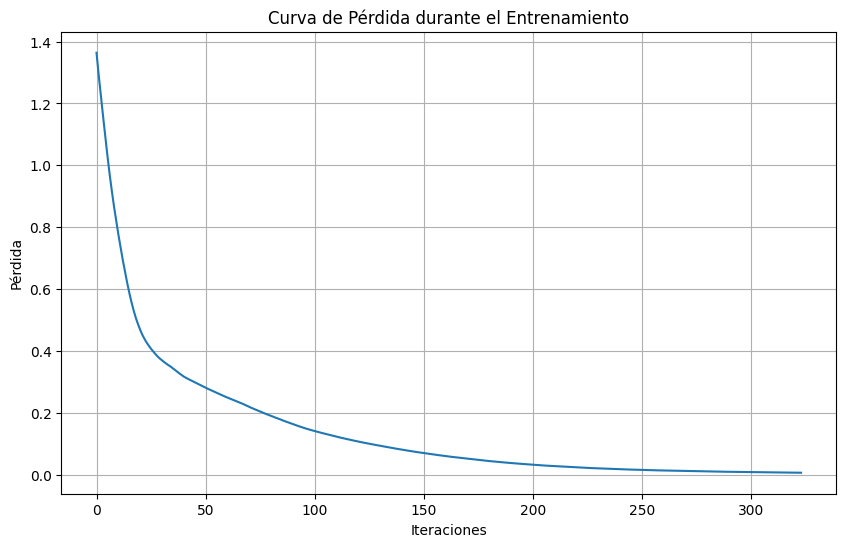

In [19]:
import matplotlib.pyplot as plt

# Crear y entrenar un nuevo modelo de red neuronal, esta vez guardando el historial de la pérdida

# Obtener el historial de la pérdida durante el entrenamiento
loss_curve = clf.loss_curve_

# Graficar la curva de pérdida
plt.figure(figsize=(10, 6))
plt.plot(loss_curve)
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()


In [20]:
# Importar NumPy
import numpy as np

# Establecemos la semilla aleatoria para que siempre cree la misma secuencia de números aleatorios
np.random.seed(42)

# Crear una matriz de 20x20 inicializada a 0
matriz = np.zeros((20, 20), dtype=int)

# Calcular el 20% de los elementos de la matriz
num_elementos = matriz.size
num_unos = int(0.2 * num_elementos)

# Elegir aleatoriamente un 20% de los índices de la matriz para establecer a 1
indices_unos = np.random.choice(np.arange(num_elementos), size=num_unos, replace=False)

# Convertir los índices unidimensionales a índices bidimensionales
filas, columnas = np.unravel_index(indices_unos, matriz.shape)

# Establecer los elementos elegidos a 1
matriz[filas, columnas] = 1

In [21]:
# Suponiendo que 'matriz' es tu matriz de 20x20


In [22]:
from IPython.display import display,clear_output
import ipywidgets as widgets

def mostrar_tabla(matriz):
    df = pd.DataFrame(matriz)
    display(df)

def siguiente_generacion(matriz):

    filas, columnas = matriz.shape

    tplus1 = np.zeros((filas, columnas), dtype=int)

    for i in range(filas):
        for j in range(columnas):
            estado_actual = matriz[i, j]
            
            # Inicializar el contador de células vivas adyacentes a 0
            celulas_vivas_adyacentes = 0
            
            # Definir el rango de vecinos a considerar
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    # Saltar la célula central (0, 0)
                    if dx == 0 and dy == 0:
                        continue
                    
                    # Coordenadas del vecino
                    x, y = i + dx, j + dy
                    
                    # Comprobar si las coordenadas están dentro de los límites de la matriz
                    if 0 <= x < filas and 0 <= y < columnas:
                        celulas_vivas_adyacentes += matriz[x, y]

                    data_test = pd.DataFrame([[estado_actual, celulas_vivas_adyacentes]], columns=['Estado_T', 'Num_Celulas_Vivas_Adyacentes'])

                    prediccion = clf.predict(data_test)

                    tplus1[i, j] = prediccion[0]
        
        return tplus1

def actualizar_tabla(b):
    global matriz
    clear_output(wait=True)
    matriz = siguiente_generacion(matriz)
    mostrar_tabla(matriz)
    display(boton_actualizar)

boton_actualizar = widgets.Button(description="Actualizar")
boton_actualizar.on_click(actualizar_tabla)
mostrar_tabla(matriz)
display(boton_actualizar)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Button(description='Actualizar', style=ButtonStyle())